In [1]:
import torch
import torch.nn as nn
import cv2
import numpy as np 
from torch import optim
import os

In [2]:
def si(img):
    '''function to show image. Press 0 to close'''
    
    cv2.imshow('image',img)
    import time
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return

Loading images and pairing with labels

In [3]:
# Loading images of white 7 black pieces into the arrays
wsqs = []
bsqs = []

for img in os.listdir('..//images//processed//white_square//'):
    wsqs.append(cv2.imread('..//images//processed//white_square//' + img))

for img in os.listdir('..//images//processed//black_square//'):
    bsqs.append(cv2.imread('..//images//processed//black_square//' + img))

In [4]:
# for i in bbs:
#     si(i)
# for i in bks:
#     si(i)
# for i in bns:
#     si(i)
# for i in bps:
#     si(i)
# for i in bqs:
#     si(i)
# for i in brs:
#     si(i)
# for i in wbs:
#     si(i)
# for i in wks:
#     si(i)
# for i in wns:
#     si(i)
# for i in wps:
#     si(i)
# for i in wqs:
#     si(i)
# for i in wrs:
#     si(i)


In [5]:
bbs = [wsqs[0], bsqs[0]] # black bishops
bks = [wsqs[1], bsqs[1]] # black kings
bns = [wsqs[2], bsqs[2]] # etc
bps = [wsqs[3], bsqs[3]]
bqs = [wsqs[4], bsqs[4]]
brs = [wsqs[5], bsqs[5]]
wbs = [wsqs[6], bsqs[6]]
wks = [wsqs[7], bsqs[7]]
wns = [wsqs[8], bsqs[8]]
wps = [wsqs[9], bsqs[9]]
wqs = [wsqs[10], bsqs[10]]
wrs = [wsqs[11], bsqs[11]]
wsq = [wsqs[-1]]
bsq = [bsqs[-1]]

In [6]:
labels_template = [i//2 for i in range(12*2)] + [12, 13]
labels = []
for i in labels_template:
    labels.append(torch.tensor([i], dtype=torch.long))
    
pieces = bbs + bks + bns + bps + bqs + brs + wbs +wks +wns +wps +wqs +wrs +wsq +bsq
# pieces =  pieces / 255

data = tuple(zip(pieces, labels))

In [15]:
print(labels)

[tensor([0]), tensor([0]), tensor([1]), tensor([1]), tensor([2]), tensor([2]), tensor([3]), tensor([3]), tensor([4]), tensor([4]), tensor([5]), tensor([5]), tensor([6]), tensor([6]), tensor([7]), tensor([7]), tensor([8]), tensor([8]), tensor([9]), tensor([9]), tensor([10]), tensor([10]), tensor([11]), tensor([11]), tensor([12]), tensor([13])]


In [7]:
# for img, label in data:
#     print(label)
#     si(img)

In [8]:
import pickle
with open('..\\data\\data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [9]:
@torch.no_grad()
def accuracy(x, y, model):
    # get the prediction matrix for a tensor of `x` images
    prediction = model(x)
    # compute if the location of maximum in each row
    # coincides with ground truth
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return float(sum(is_correct) / len(is_correct))

# Testing on all data
def get_accuracy():
    randints = range(0, len(data))
    xs = []
    ys = []
    for i in randints:
        x, y = data[i]
        x = torch.flatten(torch.tensor(x, dtype=torch.float))
        xs.append(x)
        y = int(y)
        ys.append(y)
    xs = torch.stack(xs)
    ys = torch.tensor(ys)

    print('"validation" accuracy', accuracy(xs, ys, net))
    
def validation_loss(model):
    randints = range(0, len(data))
    xs = []
    ys = []
    for i in randints:
        x, y = data[i]
        x = torch.flatten(torch.tensor(x, dtype=torch.float))
        xs.append(x)
        y = int(y)
        ys.append(y)
    xs = torch.stack(xs)
    ys = torch.tensor(ys)
    
    prediction = model(xs)
#     return prediction
    return loss_fn(prediction, ys)

In [10]:
class network(nn.Module):
    def __init__(self):
        
        super().__init__()
        self.l1 = nn.Linear(in_features=77*77*3, out_features=14)
#         self.l2 = nn.ReLU()
#         self.l3 =nn.Linear(in_features=10**2, out_features=14)
        
    def forward(self, x):
        x = x / 255
        return self.l1(x)
        # return self.l3(self.l2(self.l1(x)))

In [11]:
def init_net():
    net = network()
    loss_fn = nn.CrossEntropyLoss()
    opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.1)
    return net, loss_fn, opt

In [12]:
losses = []
vlosses = []
net, loss_fn, opt = init_net()
for num in range(10000):
    img, Y = data[np.random.randint(len(data))]
    ti = torch.tensor(img, dtype=torch.float32)
    ti = torch.flatten(ti)
    _Y = net(ti).reshape(1, -1)
    
    loss = loss_fn(_Y, Y)
    if num % 50 == 0:
        losses.append(loss)
        vlosses.append(validation_loss(net))
        if num %1000 == 0:
            get_accuracy()
    opt.zero_grad()
    loss.backward()
    opt.step()

"validation" accuracy 0.03846153989434242
"validation" accuracy 0.9615384340286255
"validation" accuracy 0.9615384340286255
"validation" accuracy 1.0
"validation" accuracy 1.0
"validation" accuracy 1.0
"validation" accuracy 1.0
"validation" accuracy 1.0
"validation" accuracy 1.0
"validation" accuracy 1.0


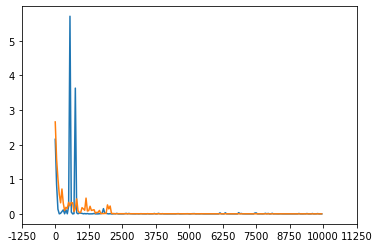

In [13]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.plot(vlosses)
ticks, _= plt.xticks()
plt.gca().set_xticks(ticks)
plt.gca().set_xticklabels([ int(i*50) for i in ticks]);

In [14]:
torch.save(net.state_dict(), "../models/basicbitch.pth")